# <center>Projet ADEME – Modélisation du problème </center>
<center><img src="./public/Source/Image/images.png"/></center>

## Sommaires

* [Introduction](#Introduction)

## Introduction <a class="anchor" id="Introduction"></a>

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur l’environnement peut être véritablement significatif.

Vous faites partie de l’équipe (4 personnes) mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.

Le périmètre reste encore à préciser. Vous avez décrit une version de base du problème. Mais, afin de le rendre plus réaliste et retenir toute l’attention de l’ADEME, vous hésitez à ajouter des contraintes supplémentaires. Il faut s’attendre à ce qu’il soit ainsi plus dur à traiter.

 

[(0, 6), (0, 14), (0, 18), (0, 13), (0, 5), (0, 10), (0, 14), (0, 1), (1, 10), (1, 7), (1, 3), (1, 5), (1, 9), (1, 13), (1, 15), (1, 10), (1, 9), (1, 13), (1, 3), (1, 3), (1, 9), (1, 13), (1, 6), (1, 4), (1, 14), (2, 9), (3, 7), (3, 16), (3, 3), (3, 9), (3, 15), (3, 6), (3, 9), (3, 4), (3, 14), (4, 11), (4, 11), (4, 17), (4, 1), (4, 7), (4, 11), (4, 7), (4, 17), (4, 3), (4, 13), (4, 16), (4, 6), (5, 8), (6, 5), (6, 6), (6, 15), (6, 18), (6, 0), (6, 18), (6, 12), (6, 17), (6, 18), (6, 7), (6, 18), (7, 9), (7, 16), (7, 16), (8, 2), (8, 11), (8, 12), (8, 12), (8, 17), (8, 8), (8, 6), (8, 11), (8, 12), (9, 4), (9, 5), (9, 7), (9, 4), (9, 18), (9, 4), (9, 12), (10, 3), (10, 1), (10, 15), (10, 9), (10, 11), (10, 14), (10, 1), (10, 8), (10, 5), (10, 4), (10, 4), (10, 5), (10, 16), (10, 1), (10, 6), (11, 7), (11, 2), (11, 15), (11, 1), (11, 3), (11, 5), (11, 11), (11, 1), (11, 13), (11, 0), (11, 18), (11, 13), (11, 12), (11, 3), (11, 16), (12, 6), (12, 14), (12, 9), (12, 11), (12, 7), (12, 17)

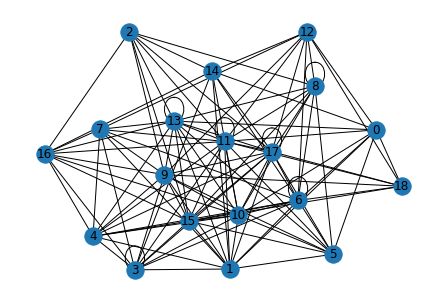

In [4]:
import networkx as nx
import random
import matplotlib.pyplot as plt

def generateEdgeList(nbIntersection,nbConnection):
        listValue = []
        for i in range(nbIntersection):
                for j in range(random.randint(0,nbConnection)):
                        way = (i, random.randint(0,nbIntersection))
                        listValue.append(way)
        graph = nx.Graph()
        print(listValue)
        graph.add_edges_from(listValue)
        nx.draw(graph, with_labels=True)
        plt.show()
generateEdgeList(18,18)

On sait maintenant que le problème du voyageur du commerce (TSP) est NP-complet, nous allons à present démontrer la classe de complexité du probeleme de tournée de vehicule.

Afin de prouver qu'un problème est NP-difficile, il suffit de le réduire un autre problème (un probleme de base) qui est de classe NP-difficile. Dans notre cas nous pouvons réduir le problème du voyageur du commerce (TSP) à une instance de (I-VRP) avec un véhicule disponible, de maniere general la réduction polynomiale d'un problème ne peut etre plus facile que le problème de base. On peut alors dire que les sous-ensemble de problèmes VRP qui correspondent à TSP sont en fait difficiles.

Les contrainte dont nous disponsont sont : 
 - Fenêtre de temps de livraison pour chaque objet
 - k camions disponibles simultanément pour effectuer les livraisons
 
Lorsqu'aucune contrainte ne s'applique, le VRP se réduit à un problème de voyageur de commerce (TSP): si l'objectif est simplement de minimiser la distance totale et si le nombre de véhicules est egale à 1 alors il s'agit probleme TSP. On peut donc voir que les TSP peuvent être considérés comme des cas particuliers de VRP. Par déduction, on les probeleme de VRP sont au moins plus difficile que les TSP donc VRP et de classe NP-difficile.
